In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import seaborn as sns
from fastai.tabular import *
from sklearn.preprocessing import *
color = sns.color_palette()

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

import os
for f in os.listdir("data/"):
    print(f)

sample_submission.csv
test.csv
train.csv


# Data Analysis

In [4]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


no of rows are less compared to the no of columns.

In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

Y is the variable we need to predict so lets look at it.

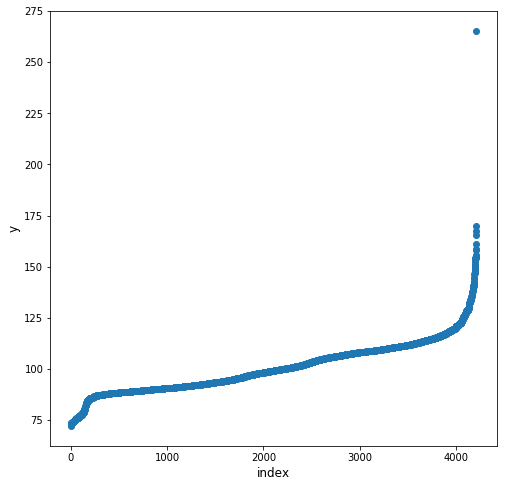

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

seems like a single data point is well above the rest. now let's plot the distribution graph

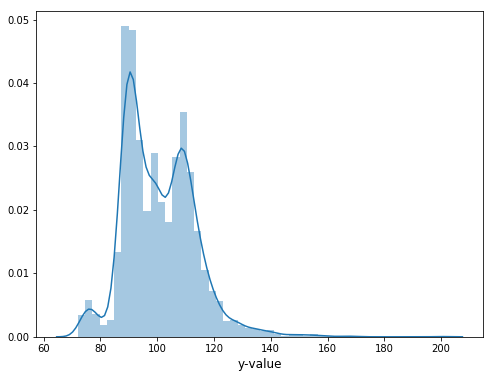

In [7]:
ulimit=200
train_df['y'].loc[train_df['y']> ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.y.values, bins=50, kde=True)# kde=True plots that curvy line
plt.xlabel('y-value', fontsize=12)
plt.show()

In [8]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
#dtype_df.head()
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


So we have 8 categorical columns with 369 int columns and the dependant variable is a float

In [9]:
dtype_df.loc[:10,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


In [10]:
# check for missing values
missing = train_df.isnull().sum(axis=0).reset_index()
#missing.head()
missing.columns = ['col name', 'missing_count']
missing = missing.loc[missing['missing_count']>0]
missing = missing.sort_values(by='missing_count')
missing

,col name,missing_count


In [11]:
train_df.nunique()

ID      4209
y       2545
X0        47
X1        27
X2        44
X3         7
X4         4
X5        29
X6        12
X8        25
X10        2
X11        1
X12        2
X13        2
X14        2
X15        2
X16        2
X17        2
X18        2
X19        2
X20        2
X21        2
X22        2
X23        2
X24        2
X26        2
X27        2
X28        2
X29        2
X30        2
        ... 
X355       2
X356       2
X357       2
X358       2
X359       2
X360       2
X361       2
X362       2
X363       2
X364       2
X365       2
X366       2
X367       2
X368       2
X369       2
X370       2
X371       2
X372       2
X373       2
X374       2
X375       2
X376       2
X377       2
X378       2
X379       2
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 378, dtype: int64

In [12]:
df = train_df.nunique()>2
cat = []
for i, row in df.iteritems():
    if row == True: cat.append(i)
print(cat)
cat.remove('y')
cat.remove('ID')
cat # all the categorical variables in the df

['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [13]:
# Integer column analysis
df = train_df.nunique()<2 # if the column has only one unique value then we can remove it
remove = []
for i, row in df.iteritems():
    if row == True: remove.append(i)
remove

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

This means that all the other columns have binary values

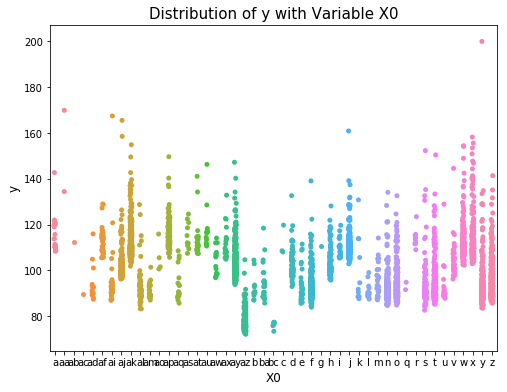

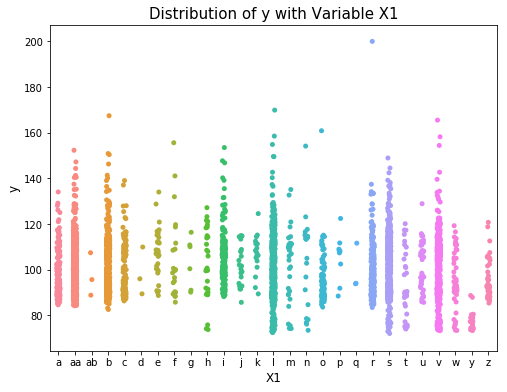

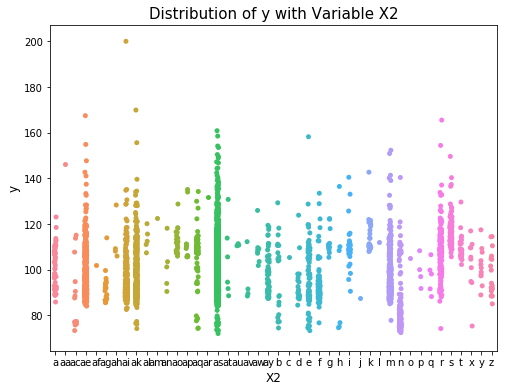

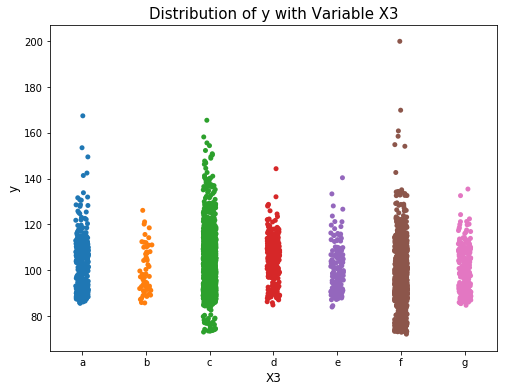

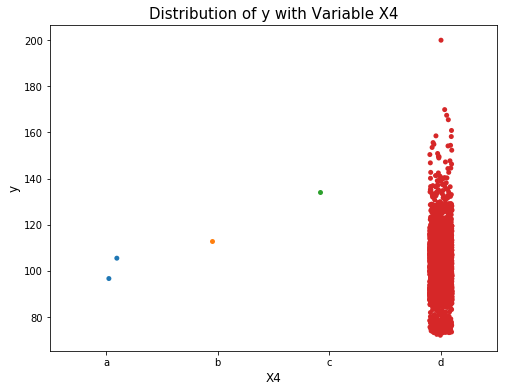

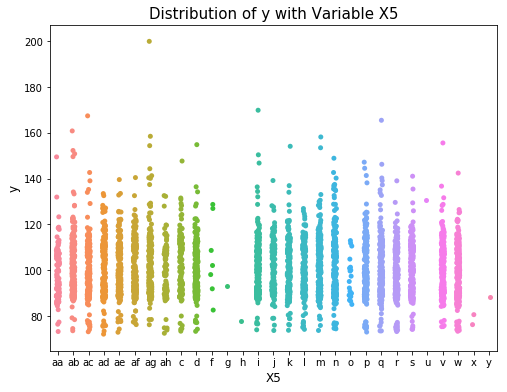

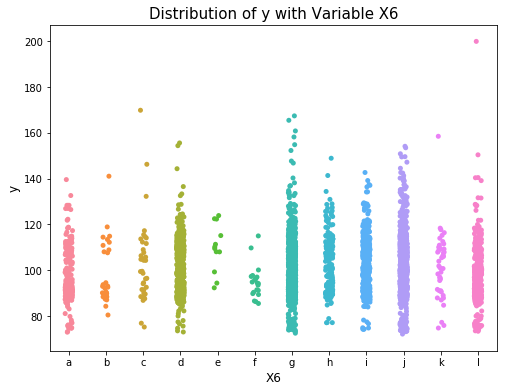

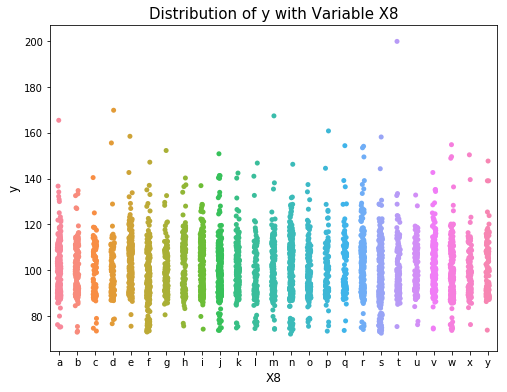

In [14]:
# exploring the categorical columns
for var in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
    col_order = np.sort(train_df[var].unique()).tolist()
    plt.figure(figsize=(8,6))
    # can also use sns.boxplot or violinplot
    sns.stripplot(x=var, y='y', data= train_df, order=col_order)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'Distribution of y with Variable {var}', fontsize=15)
    plt.show()

In [15]:
train_df.columns.values.tolist()

['ID',
 'y',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X8',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 '

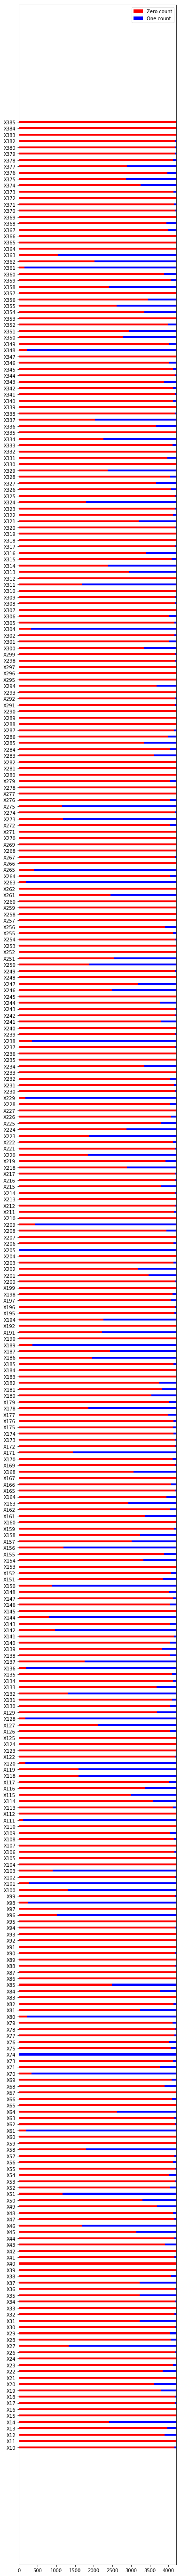

In [16]:
# now lets work with binary variables
binary = [i for i in train_df.columns.values.tolist() if i not in cat and remove and i!='y' and i!='ID']
#binary
zero_count = []
one_count = []
for col in binary:
    zero_count.append((train_df[col]==0).sum())
    one_count.append((train_df[col]==1).sum())
    
N = len(binary)
ind = np.arange(N) # an array from 0 to N
width = 0.3

plt.figure(figsize=(6, 100))
p1 = plt.barh(ind, zero_count, width, color='red')
p2 = plt.barh(ind, one_count, width, left= zero_count, color='blue')
plt.yticks(ind, binary)# yticks are the values displayed on the y-axis
plt.legend((p1[0], p2[0]), ('Zero count', 'One count'))
plt.show()


Now let us check the mean y value in each of the binary variable.

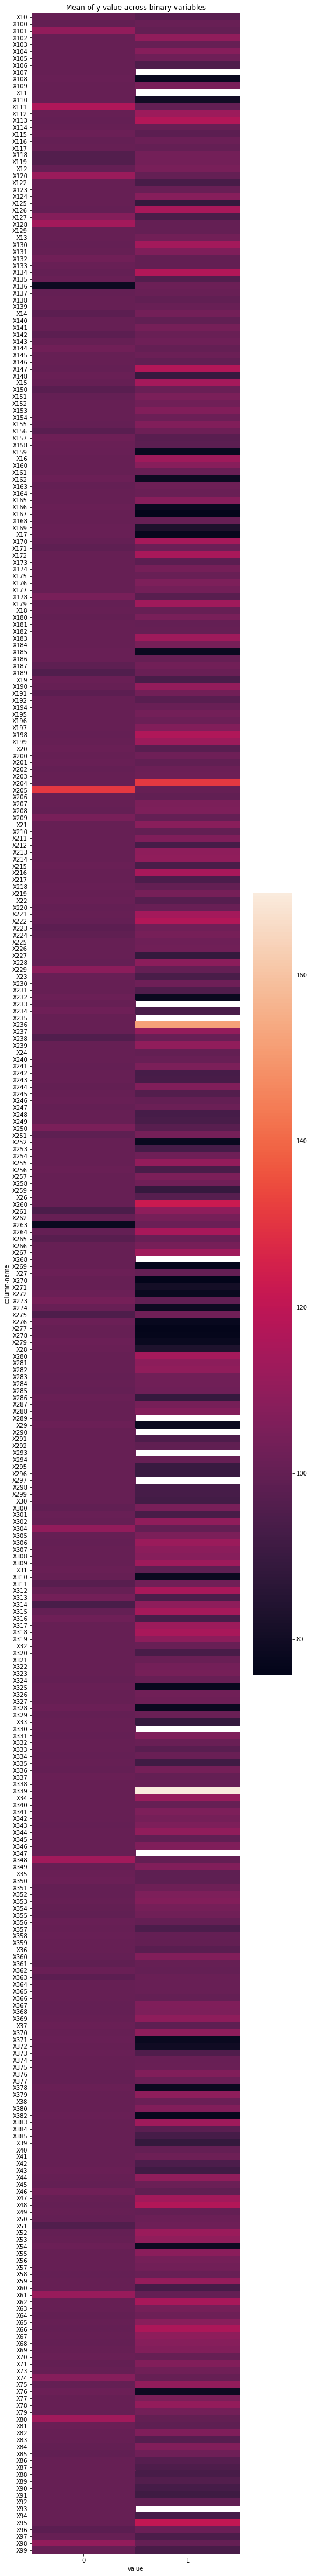

In [17]:
zero_mean_list = []
one_mean_list = []
# binary
for col in binary:
    zero_mean_list.append(train_df.loc[train_df[col]==0].y.mean())
    one_mean_list.append(train_df.loc[train_df[col]==1].y.mean())
    
new_df = pd.DataFrame({'column-name': binary+binary, 
                      'value':[0]*len(binary)+ [1]*len(binary),
                      'y-mean':zero_mean_list+one_mean_list})
#new_df
new_df = new_df.pivot(index='column-name', columns='value', values='y-mean')
#new_df
plt.figure(figsize=(8, 80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables")
plt.show()

In [18]:
new_df.head()

value,0,1
column-name,,
X10,100.693316,97.723214
X100,99.778420,101.046740
X101,110.198376,99.996973
X102,100.591608,109.617931
X103,100.472172,100.703689


Binary variables which show a good color difference in the above graphs between 0 and 1 are likely to be more predictive fgiven the count distribution is also good between both the classes(can be seen from the prev graph). We will dive into more important variables in the later part of the notebook

### ID variable
One more thing we need to look at is the ID variable. This will give us an idea of how splits are done across train and test(random or id based) & also help to see if ID has some potential prediction capability(not so helpful for business).  
  
Lets see how the y variable changes with ID

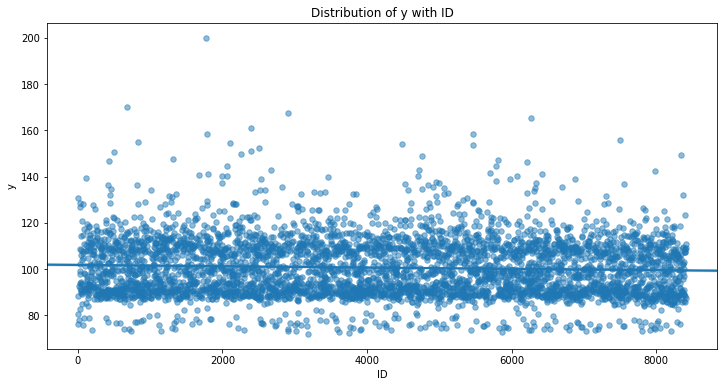

In [19]:
var_name = 'ID'
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=train_df, scatter_kws={'alpha':0.5, 's': 30})
plt.xlabel(var_name)
plt.ylabel('y')
plt.title(f'Distribution of y with {var_name}')
plt.show()

Seems to be a slight decreasing trend wrt ID. Now llets see how the IDs are distributed across train & test

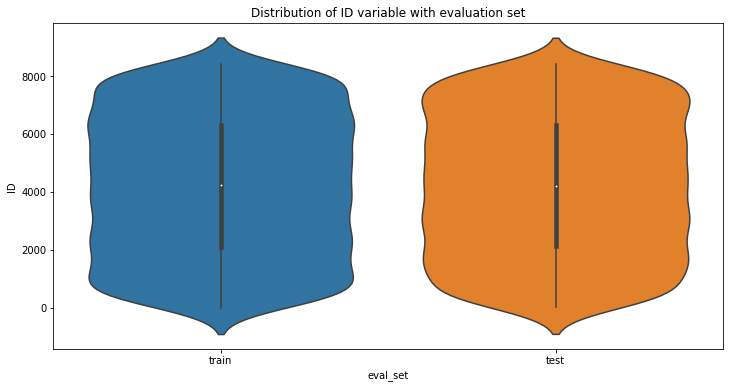

In [20]:
train_df['eval_set'] = 'train'
test_df['eval_set'] = 'test'
full_df = pd.concat([train_df[['ID', 'eval_set']], test_df[['ID', 'eval_set']]], axis=0)
plt.figure(figsize=(12,6))
sns.violinplot(x='eval_set', y='ID', data=full_df)
plt.xlabel('eval_set')
plt.ylabel('ID')
plt.title('Distribution of ID variable with evaluation set')
plt.show()

The distribution seems random.

Now lets run an xgboost model to get the important variables

# Model

In [21]:
cat

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [22]:
train_df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384', 'X385',
       'eval_set'],
      dtype='object', length=379)